In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

IMPORTING THE LIBRARIES

In [3]:
train_path=r'C:\Users\ADMIN\Desktop\vedant\ML\covid\Covid19-dataset\train'
test_path=r'C:\Users\ADMIN\Desktop\vedant\ML\covid\Covid19-dataset\test'

IMAGE_SIZE = [224, 224]

DETERMING THE PATH OF THE TRAIN AND TEST DATA

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in vgg.layers:
  layer.trainable = False

In [6]:
file = glob(r'C:\Users\ADMIN\Desktop\vedant\ML\covid\Covid19-dataset\train\*')

In [7]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(file), activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(r'C:\Users\ADMIN\Desktop\vedant\ML\covid\Covid19-dataset\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'C:\Users\ADMIN\Desktop\vedant\ML\covid\Covid19-dataset\train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 251 images belonging to 3 classes.
Found 251 images belonging to 3 classes.


In [13]:
test_set.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [14]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  
)

Epoch 1/5
8/8 [==============================] - 354s 46s/step - loss: 1.2205 - accuracy: 0.5538 - val_loss: 0.2944 - val_accuracy: 0.8805
Epoch 2/5
8/8 [==============================] - 306s 41s/step - loss: 0.3317 - accuracy: 0.8685 - val_loss: 0.2295 - val_accuracy: 0.9044
Epoch 3/5
8/8 [==============================] - 305s 40s/step - loss: 0.2647 - accuracy: 0.9163 - val_loss: 0.1533 - val_accuracy: 0.9363
Epoch 4/5
8/8 [==============================] - 303s 40s/step - loss: 0.1633 - accuracy: 0.9402 - val_loss: 0.1076 - val_accuracy: 0.9562
Epoch 5/5
8/8 [==============================] - 303s 41s/step - loss: 0.1216 - accuracy: 0.9641 - val_loss: 0.1321 - val_accuracy: 0.9562


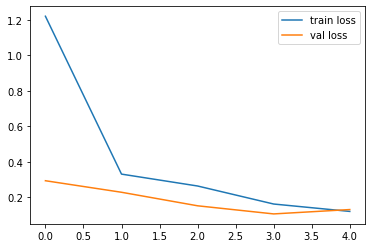

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [17]:
model.evaluate_generator(training_set)

<ipython-input-17-95509758640b>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(training_set)


[0.13092228770256042, 0.9601593613624573]

In [18]:
model.evaluate_generator(test_set)

<ipython-input-18-274e5d51fe4d>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_set)


[0.13211233913898468, 0.9561753273010254]

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('face_detect.h5')